### **0. Set-up**

In [1]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [2]:
# Load NL predicted gpt-3.5-turbo-0125
nl_f9_1 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f9-1.csv")
nl_f9_2 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f9-2.csv")
nl_f9_3 = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f9-3.csv")

# Combine dataframes
raw_gpt_pred = pd.concat([nl_f9_1, nl_f9_2, nl_f9_3], ignore_index=True)

# Load NL predicted text-embedding-3-large
raw_emb_pred = pd.read_csv("../../../../data/text-embedding-3-large/nl.csv")

In [3]:
# Show results
raw_gpt_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,0.1,1.91,1.00,0.14,2.00,0.25,1.00,0.1,1.00,1.00,1.00,0.1,1.0,1.0,0.2
1,slim,intelligent,8.5,9.00,8.70,9.00,9.00,9.50,8.50,9.0,9.00,9.50,8.50,8.5,8.5,8.5,8.5
2,hard,moeilijk,7.5,7.20,7.50,8.00,9.50,8.00,8.50,8.5,8.50,8.50,8.50,7.5,6.5,7.5,9.0
3,gelukkig,vrolijk,5.8,6.50,7.50,8.50,0.65,7.50,7.50,9.0,7.50,7.50,6.50,7.5,7.5,7.5,7.5
4,hard,stoer,6.0,0.30,6.00,6.50,7.50,7.50,0.60,5.5,5.65,0.30,6.50,0.2,5.0,0.4,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,1.2,0.00,2.50,2.00,0.00,0.10,0.20,0.0,0.00,2.50,0.20,0.0,2.5,0.0,0.0
993,sturen,bijwonen,0.0,1.20,0.00,0.00,0.00,1.23,2.27,0.0,0.00,0.10,0.00,0.0,0.0,0.0,0.0
994,verzamelen,bijwonen,0.0,0.10,0.00,0.00,0.00,0.00,0.00,0.0,1.20,0.00,0.00,0.0,0.0,0.0,0.0
995,opnemen,intrekken,0.1,2.50,2.33,2.50,3.45,1.50,0.00,2.5,2.14,1.25,1.67,2.5,2.5,0.2,2.5


In [4]:
# Show results
raw_emb_pred

,word1,word2,similarity_score
0,oud,nieuw,0.40
1,slim,intelligent,0.26
2,hard,moeilijk,0.36
3,gelukkig,vrolijk,0.73
4,hard,stoer,0.41
...,...,...,...
992,samenvoegen,verwerven,0.42
993,sturen,bijwonen,0.39
994,verzamelen,bijwonen,0.39
995,opnemen,intrekken,0.49


### **1. Data Processing**

In [5]:
# Copy dataframe
gpt_pred = raw_gpt_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
gpt_pred['gpt_pred_sl'] = gpt_pred[similarity_cols].mean(axis=1).round(2)

# Select columns
gpt_pred = gpt_pred[['word1', 'word2', 'gpt_pred_sl']]

# Show results
gpt_pred

,word1,word2,gpt_pred_sl
0,oud,nieuw,0.79
1,slim,intelligent,8.81
2,hard,moeilijk,8.05
3,gelukkig,vrolijk,6.96
4,hard,stoer,4.26
...,...,...,...
992,samenvoegen,verwerven,0.75
993,sturen,bijwonen,0.32
994,verzamelen,bijwonen,0.09
995,opnemen,intrekken,1.84


In [6]:
# Copy dataframe
emb_pred = raw_emb_pred.copy()

# Normalize cosine similarity to to 0-10 scale
emb_pred['scaled_similarity_score'] = 5 * (emb_pred['similarity_score'] + 1)

# Rename columns
emb_pred = emb_pred.rename(columns={'scaled_similarity_score': 'emb_pred_sl'})

# Select columns
emb_pred = emb_pred[['word1', 'word2', 'emb_pred_sl']]

# Show results
emb_pred

,word1,word2,emb_pred_sl
0,oud,nieuw,7.00
1,slim,intelligent,6.30
2,hard,moeilijk,6.80
3,gelukkig,vrolijk,8.65
4,hard,stoer,7.05
...,...,...,...
992,samenvoegen,verwerven,7.10
993,sturen,bijwonen,6.95
994,verzamelen,bijwonen,6.95
995,opnemen,intrekken,7.45


In [7]:
# Concatenate DataFrames
conc = pd.concat([gpt_pred, emb_pred], axis=1)

# Show results
conc

,word1,word2,gpt_pred_sl,word1,word2,emb_pred_sl
0,oud,nieuw,0.79,oud,nieuw,7.00
1,slim,intelligent,8.81,slim,intelligent,6.30
2,hard,moeilijk,8.05,hard,moeilijk,6.80
3,gelukkig,vrolijk,6.96,gelukkig,vrolijk,8.65
4,hard,stoer,4.26,hard,stoer,7.05
...,...,...,...,...,...,...
992,samenvoegen,verwerven,0.75,samenvoegen,verwerven,7.10
993,sturen,bijwonen,0.32,sturen,bijwonen,6.95
994,verzamelen,bijwonen,0.09,verzamelen,bijwonen,6.95
995,opnemen,intrekken,1.84,opnemen,intrekken,7.45


### **2. Descriptive Statistics**

In [8]:
# Summary statistics SimLex-999
gpt_pred_sl_summary = round(gpt_pred['gpt_pred_sl'].describe(), 2)
emb_pred_sl_summary = round(emb_pred['emb_pred_sl'].describe(), 2)

# Add median SimLex-999
gpt_pred_sl_summary['median'] = round(gpt_pred['gpt_pred_sl'].median(), 2)
emb_pred_sl_summary['median'] = round(emb_pred['emb_pred_sl'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "gpt_pred_sl": gpt_pred_sl_summary,
    "emb_pred_sl": emb_pred_sl_summary,
})

# Show results
summary_df

,gpt_pred_sl,emb_pred_sl
count,997.00,997.00
mean,4.08,7.19
std,3.01,0.67
min,0.00,5.55
25%,1.37,6.70
50%,3.08,7.15
75%,7.08,7.60
max,9.67,9.80
median,3.08,7.15


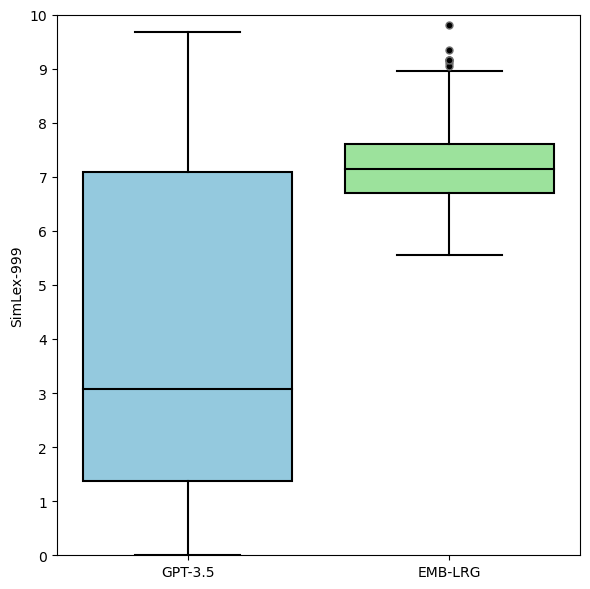

In [9]:
# Rename columns and copy
renamed_gpt_pred_sl = gpt_pred.rename(columns={"gpt_pred_sl": "SimLex-999"}).copy()
renamed_emb_pred_sl = emb_pred.rename(columns={"emb_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_gpt_pred_sl['Score'] = 'GPT-3.5'
renamed_emb_pred_sl['Score'] = 'EMB-LRG'

# Combine DataFrames
combined_data = pd.concat([renamed_gpt_pred_sl, renamed_emb_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

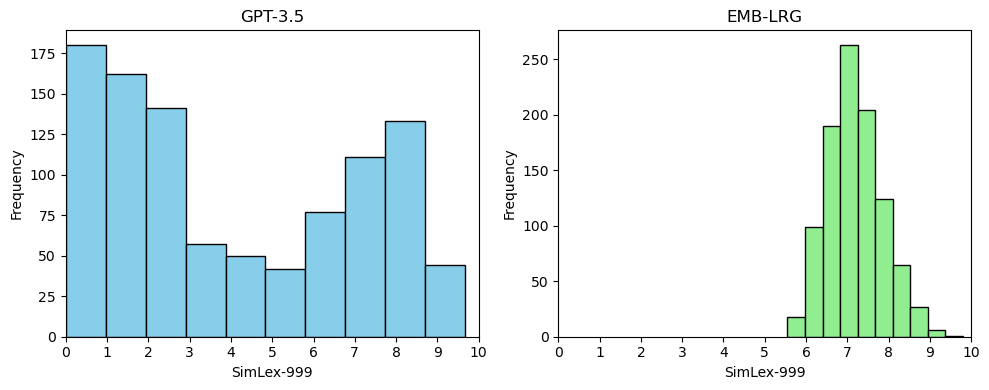

In [10]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_gpt_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('GPT-3.5')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_emb_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EMB-LRG')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. GPT**

In [11]:
# Count outliers
print_outlier_counts(gpt_pred)

No outliers found in columns: gpt_pred_sl


In [12]:
# Row outliers
print_outlier_data(gpt_pred, 'gpt_pred_sl')

No outliers found in gpt_pred_sl


#### **4.2. EMB**

In [13]:
# Count outliers
print_outlier_counts(emb_pred)

Outliers in emb_pred_sl: 7


In [14]:
# Row outliers
print_outlier_data(emb_pred, 'emb_pred_sl')


Outliers in emb_pred_sl:
            word1        word2  emb_pred_sl
109    echtgenote   echtgenoot         9.80
125       actrice       acteur         9.10
234       bedrijf  onderneming         9.15
383   onderneming      bedrijf         9.15
569  gelukkigheid        geluk         9.35
665          buik    onderbuik         9.05
838     deelnemen      meedoen         9.15


#### **4.3. Add to Summary**

In [15]:
# Calculate outliers
outliers_gpt_pred_sl = calculate_outliers(gpt_pred, 'gpt_pred_sl')
outliers_emb_pred_sl = calculate_outliers(emb_pred, 'emb_pred_sl')

# Count outliers
count_outliers_gpt_pred_sl = outliers_gpt_pred_sl.shape[0]
count_outliers_emb_pred_sl = outliers_emb_pred_sl.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_gpt_pred_sl, count_outliers_emb_pred_sl], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,gpt_pred_sl,emb_pred_sl
count,997.00,997.00
mean,4.08,7.19
std,3.01,0.67
min,0.00,5.55
25%,1.37,6.70
50%,3.08,7.15
75%,7.08,7.60
max,9.67,9.80
median,3.08,7.15
outliers,0.00,7.00


### **5. Evaluation Metrics**

#### **5.1. Spearmans's Rank Correlation**

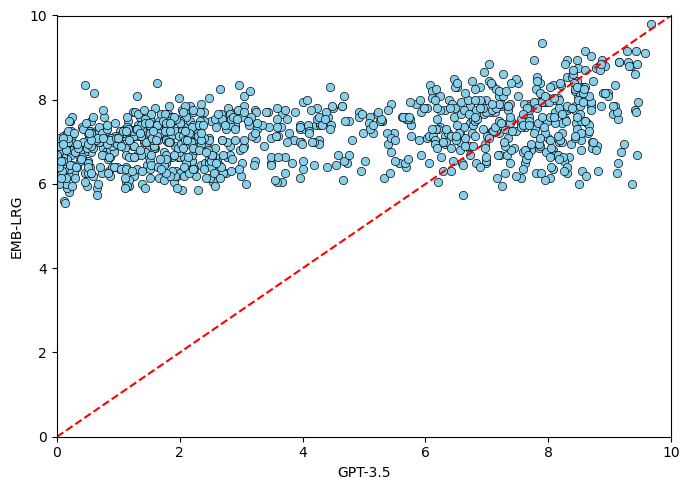

In [16]:
# Scatter plot
plot_scatter_plot(conc, 'gpt_pred_sl', 'emb_pred_sl', 'GPT-3.5', 'EMB-LRG', 0, 10, 0, 10)

In [17]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'gpt_pred_sl', 'emb_pred_sl')

Spearman's Rank correlation: 0.45104
P-value: 4.011466206780752e-51
The correlation is statistically significant.



#### **5.2. Mean Square Error (MSE)**

In [18]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['gpt_pred_sl'], conc['emb_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 17.32


#### **5.3. Mean Absolute Error (MAE)**

In [19]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['gpt_pred_sl'], conc['emb_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 3.45
